In [1]:
stime = 1000.0 # simulate the neuron for 1000ms
dt = 0.5 # timestep of 0.5ms
# Izekevich constants
d = 8.0
a = 0.02
c = -65.0
b = 0.2
#Array of timesteps
T = round(Int,(ceil(stime/dt))) 
#Initialize membrane potential variables of Izekevich model
v = zeros(T,1)
u = zeros(T,1)
v[1] = -70.0
u[1] = -14.0

#Incoming synapses
n_in = 5  # number of input synapses
rate = 2e-3 # poison rate of input spikes (2hz = 2e-3 spikes/ms)
tau_g = 10.0  # decay constant for the PSconductance (filter)
g_in = zeros(n_in,1) # conductances
E_in = zeros(n_in,1) # driving potential; 0 for exctitatory 
w_in = 0.07 * ones(1, n_in) # weights of the synapses

1x5 Array{Float64,2}:
 0.07  0.07  0.07  0.07  0.07

In [2]:
tic();
for t = 1:T-1    
    #generate poison spikes
    if (t*dt > 200.0) && (t*dt < 700.0)
        p = float(rand(n_in,1) .< rate*dt)
    else 
        p = zeros(n_in,1);
    end
 
    g_in = g_in + p   # update condutance for each spike
    Iapp = (w_in * (g_in .* E_in)) - ((w_in * g_in)*v[t])
    Iapp = Iapp[1,1] # Iapp is 2x2 array with one element != float !!
    
    g_in = (1.0 - (dt/tau_g)) *g_in
    
    
    if(v[t] < 35.0)
        dv = (v[t]*(0.04*v[t] + 5.0)) + 140.0 - u[t];
        v[t+1] = v[t] + (dv + Iapp)*dt;
        du = a*(b * v[t] - u[t]);
        u[t+1] = u[t] + dt*du;
    else
        v[t] = 35.0;
        v[t+1] = c;
        u[t+1] = u[t] + d;
    end
    
end
toc();




elapsed time: 0.915919525 seconds


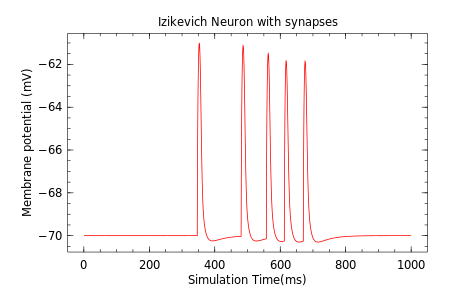

In [4]:
using Winston
time = dt*(1:T)
plot(time,v, "r")
title("Izikevich Neuron with synapses")
xlabel("Simulation Time(ms)")
ylabel("Membrane potential (mV)") 